# The Sparks Foundation

## Domain - Data Science and Business Analytics
## Batch - November 2021
### Author - Deep Ranjan Guha


      Copyright  Deep Ranjan Guha,2021

#### Task 3 - Exploratory Data Analysis - Retail

#### Dataset - https://bit.ly/3i4rbWl

In [1]:
# importing the required libraries:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the dataset

In [2]:
data=pd.read_csv('/Users/deepranjanguha/Desktop/Data Science /Sparks Foundation/Datasets/SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
data.info() # Checking the info
print('\n','Shape : ',data.shape)  # Checking the shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB

 Shape :  (9994, 13)


* The no of records : 9994
* The no of attributes : 13

In [4]:
data.describe().T  # Checking the 5 point summary

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


* Since the mean value of the featues ``Sales`` and ``Profit`` are greater than their median values it can be concluded that there are potential outleirs present in the distribution.
* The features such as ``Discount`` and ``Quantity`` have near normal distribution as the mean and median values are close to each other.

#### Numerical and Categorical Features:

In [5]:
data_num=data.select_dtypes(np.number)
data_cat=data.select_dtypes(object)
print('The numerical features : ')
print(data_num.columns,'\n')
print('The categorical features : ')
print(data_cat.columns)

The numerical features : 
Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object') 

The categorical features : 
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')


#### Checking the symmetry of the data:

In [6]:
data.skew()

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64

* As observed previously, features ``Sales`` and ``Profit`` are right skewed.

#### Checking and treating duplicate values: 

In [7]:
# Checking the number of duplicate entries
print('Number of duplicate entries : ',data.duplicated().sum(),'\n')

# dropping the duplicate entries permanently
data.drop_duplicates(inplace=True)
print('Number of duplicates after treatment : ',data.duplicated().sum())

Number of duplicate entries :  17 

Number of duplicates after treatment :  0


#### Checking the presence of Null/Missing Values:

In [111]:
count=data.isna().sum()
percent=((count/data.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
Ship Mode,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0
State,0,0.0
Postal Code,0,0.0
Region,0,0.0
Category,0,0.0
Sub-Category,0,0.0
Sales,0,0.0


* Hence there are no missing records present in the dataset.

#### Univariate Analysis:

Since the feature ``Postal Code`` is not relevant, I will drop the feature.

In [8]:
data_num=data_num.drop('Postal Code',axis=1)
data_num.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

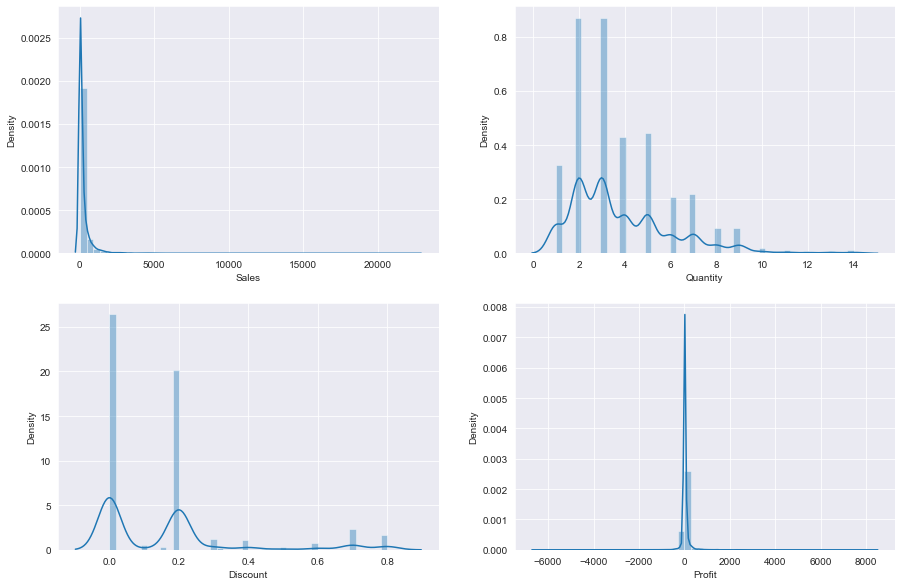

In [97]:
# Univariate analysis for numerical features:
plt.rcParams['figure.figsize']=(15,10)
j=1
sns.set_style('darkgrid')
for i in data_num:
    plt.subplot(2,2,j)
    sns.distplot(data[i])
    j+=1
plt.show()

* There is postive skewness present in the data.

In [68]:
# Univariate analysis of categorical features:
for i in data_cat:
    count=data[i].value_counts()
    percent=data[i].value_counts(normalize=True)*100
    print(pd.DataFrame({'Count':count,'Percentage %':percent}),'\n')

                Count  Percentage %
Standard Class   5955     59.687281
Second Class     1943     19.474792
First Class      1537     15.405432
Same Day          542      5.432495 

             Count  Percentage %
Consumer      5183     51.949484
Corporate     3015     30.219505
Home Office   1779     17.831011 

               Count  Percentage %
United States   9977         100.0 

                 Count  Percentage %
New York City      914      9.161070
Los Angeles        746      7.477198
Philadelphia       536      5.372356
San Francisco      506      5.071665
Seattle            424      4.249774
...                ...           ...
Glenview             1      0.010023
Missouri City        1      0.010023
Rochester Hills      1      0.010023
Palatine             1      0.010023
Manhattan            1      0.010023

[531 rows x 2 columns] 

                      Count  Percentage %
California             1996     20.006014
New York               1127     11.295981
Texas           

#### Bivariate Analysis:

I . Losses made as per Region:

In [66]:
print('Sub-classes in Region : ')
print('\n'.join(data['Region'].unique()),'\n')
print('No of values in each sub-class : ')
print(data['Region'].value_counts())

Sub-classes in Region : 
South
West
Central
East 

No of values in each sub-class : 
West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


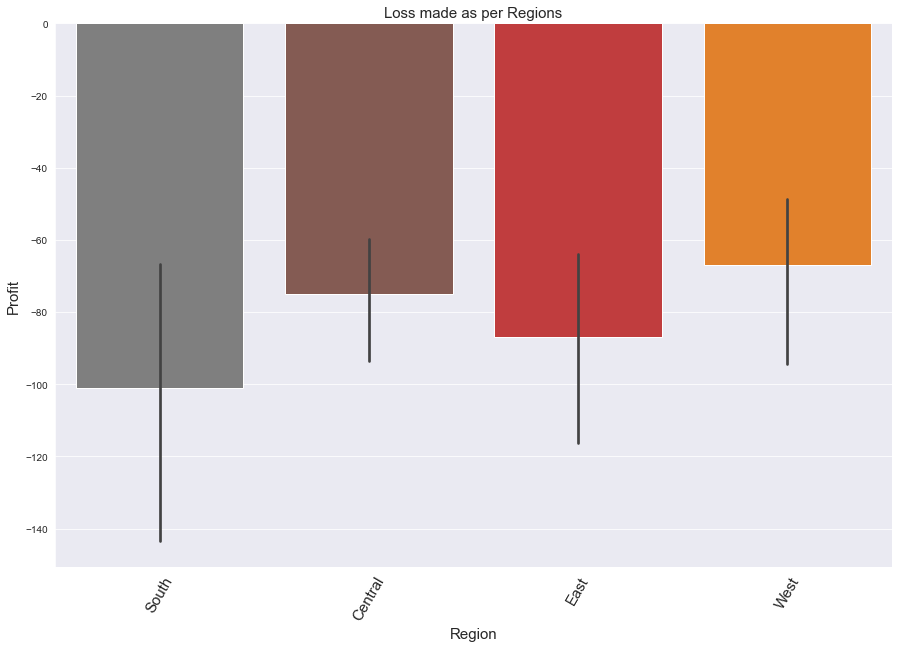

In [93]:
plt.figure(figsize=(15,10))
sns.barplot(x=data[data['Profit']<=0]['Region'],y=data[data['Profit']<=0]['Profit'],palette='tab10_r')
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Loss made as per Regions',fontsize=15)
plt.show()

* From the above plot it can be concluded that the South Region suffers maximum loss and should be considered for strict monitoring.
* The East Region incurrs the 2nd highest loss.

II . Losses made as per State:

In [64]:
print('Sub-classes in State : ')
print('\n'.join(data['State'].unique()),'\n')
print('No of values in each sub-class : ')
print(data['State'].value_counts())

Sub-classes in State : 
Kentucky
California
Florida
North Carolina
Washington
Texas
Wisconsin
Utah
Nebraska
Pennsylvania
Illinois
Minnesota
Michigan
Delaware
Indiana
New York
Arizona
Virginia
Tennessee
Alabama
South Carolina
Oregon
Colorado
Iowa
Ohio
Missouri
Oklahoma
New Mexico
Louisiana
Connecticut
New Jersey
Massachusetts
Georgia
Nevada
Rhode Island
Mississippi
Arkansas
Montana
New Hampshire
Maryland
District of Columbia
Kansas
Vermont
Maine
South Dakota
Idaho
North Dakota
Wyoming
West Virginia 

No of values in each sub-class : 
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  1

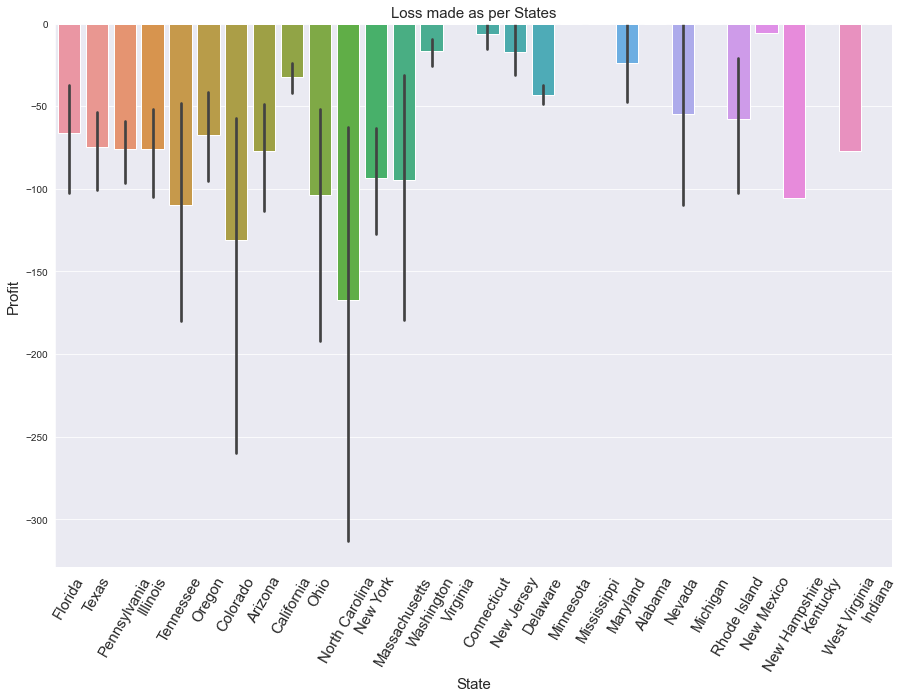

In [92]:
plt.figure(figsize=(15,10))
sns.barplot(x=data[data['Profit']<=0]['State'],y=data[data['Profit']<=0]['Profit'])
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Loss made as per States',fontsize=15)
plt.show()

* The states in the above plot have a ptofit which is less than or equal to 0.
* The states have a magnitude of profit on the negative scale.
* Proper analysis should be done to identify and rectify the reasons for such poor performance.

III . Losses made as per Shipment Mode:

In [62]:
print('Sub-classes in Ship Mode : ')
print('\n'.join(data['Ship Mode'].unique()),'\n')
print('No of values in each sub-class : ')
print(data['Ship Mode'].value_counts())

Sub-classes in Ship Mode : 
Second Class
Standard Class
First Class
Same Day 

No of values in each sub-class : 
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


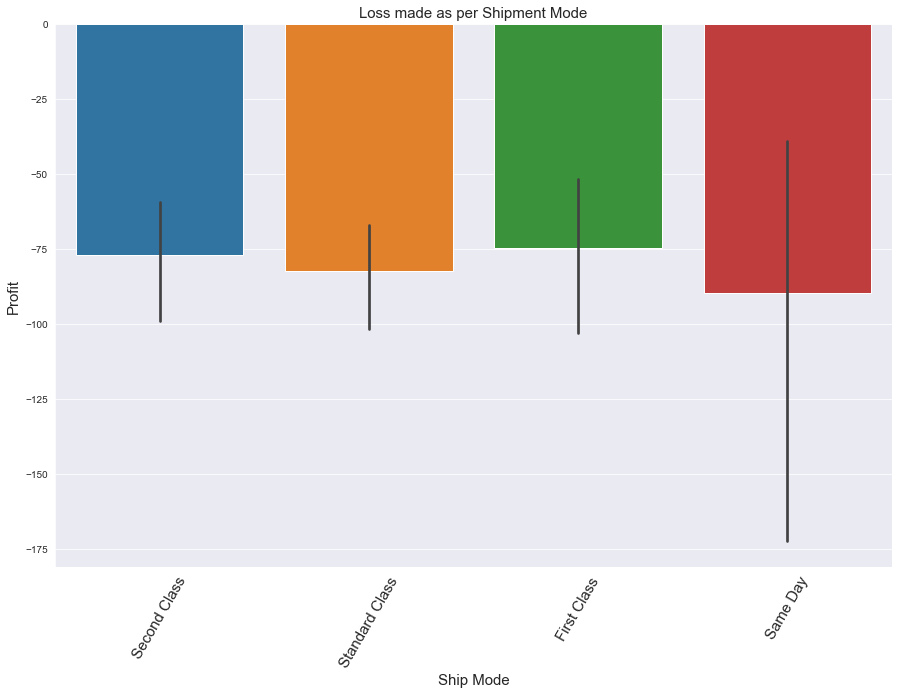

In [91]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['Ship Mode'],y=data[data['Profit']<=0]['Profit'])
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Ship Mode',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Loss made as per Shipment Mode',fontsize=15)
plt.show()

* The Shipment made on the same day has incurred maximum losses as compared to the other classes of Shipment mode.

IV . Losses made as per Segment:

In [69]:
print('Sub-classes in Segment : ')
print('\n'.join(data['Segment'].unique()),'\n')
print('No of values in each sub-class : ')
print(data['Segment'].value_counts())

Sub-classes in Segment : 
Consumer
Corporate
Home Office 

No of values in each sub-class : 
Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


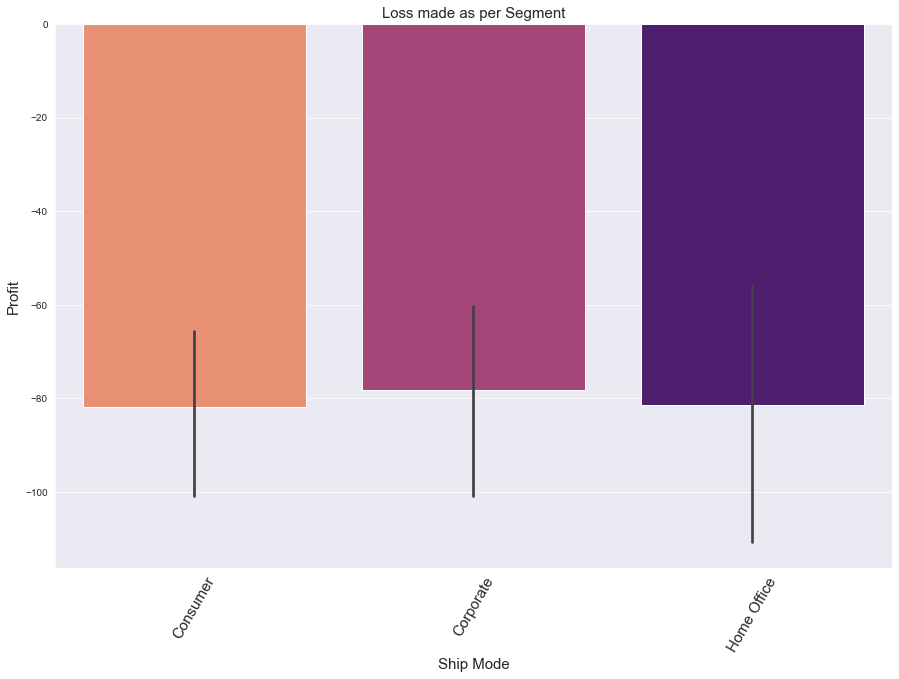

In [90]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['Segment'],y=data[data['Profit']<=0]['Profit'],palette='magma_r')
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Ship Mode',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Loss made as per Segment',fontsize=15)
plt.show()

* The Consumer segment has incurred highest loss.

V . Losses as per Category and Sub-Category:

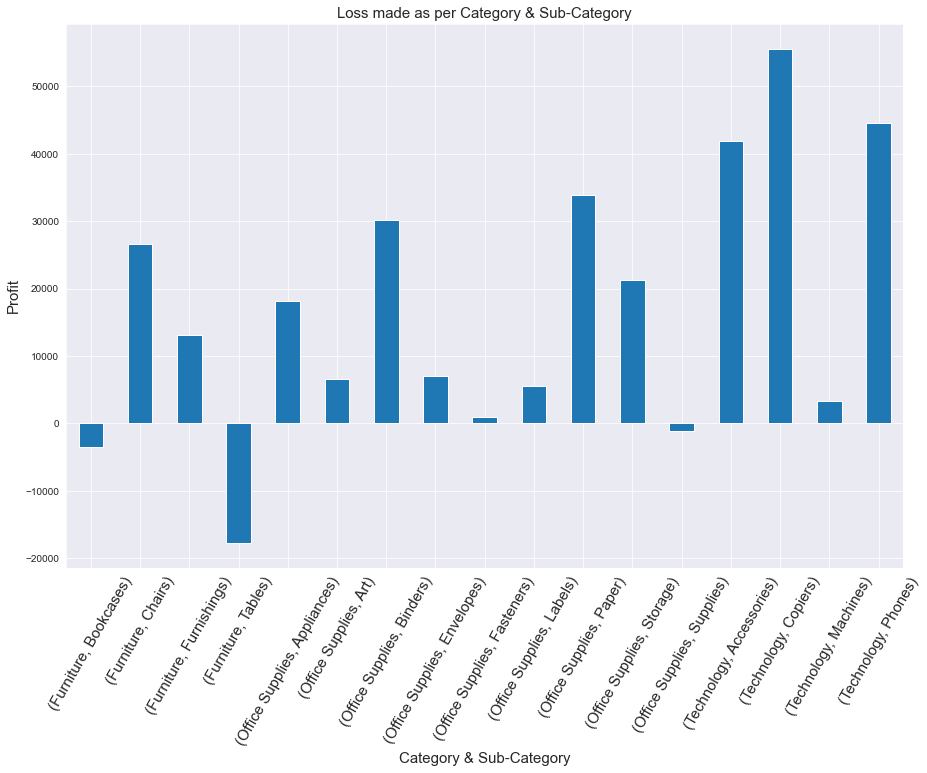

In [94]:
data.groupby(['Category','Sub-Category'])['Profit'].sum().plot(kind='bar',figsize=(15,10))
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Category & Sub-Category',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.title('Loss made as per Category & Sub-Category',fontsize=15)
plt.show()

* Bookcases and Tables in the ``Furnitures`` category has suffered losses.
* Storage in the ``Office Supplies`` category has suffered losses.

#### Compariosn of Profit/Loss and Sales w.r.t each business indicex:

I . Profit/Loss Vs Sales as per Region: 

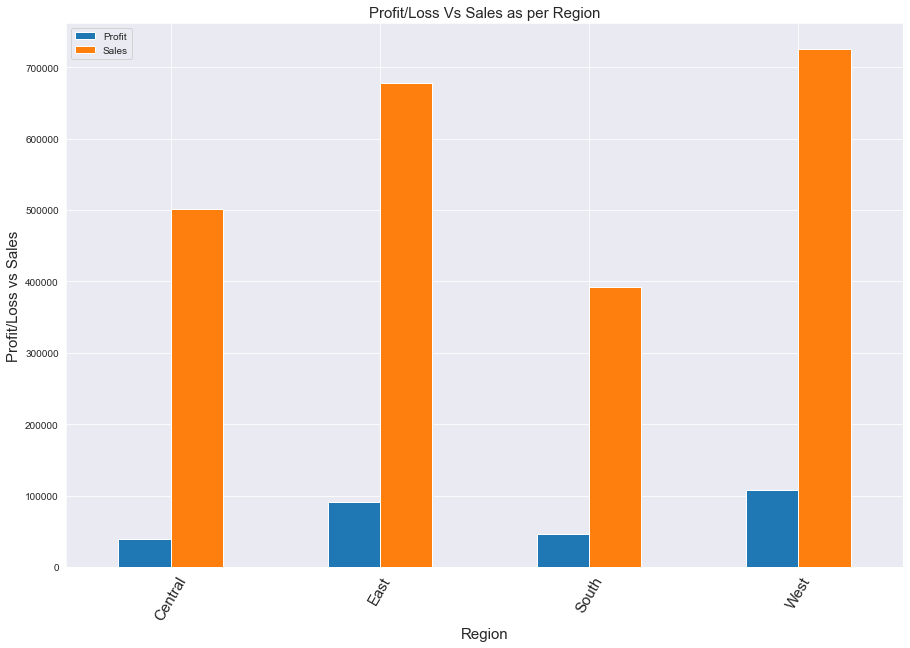

In [96]:
data.groupby(['Region'])['Profit','Sales'].sum().plot(kind='bar',figsize=(15,10))
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Profit/Loss vs Sales',fontsize=15)
plt.title('Profit/Loss Vs Sales as per Region',fontsize=15)
plt.show()

* West region has highest sales and the highest profit.
* East Region has second highest sales and second highest profit.
* South region has sales lower than Central region but has a more profit than Central. Therefore monitoring the Central region is recommended as to understand why they are incurring losses.

II . Profit/Loss Vs Sales as per Category:

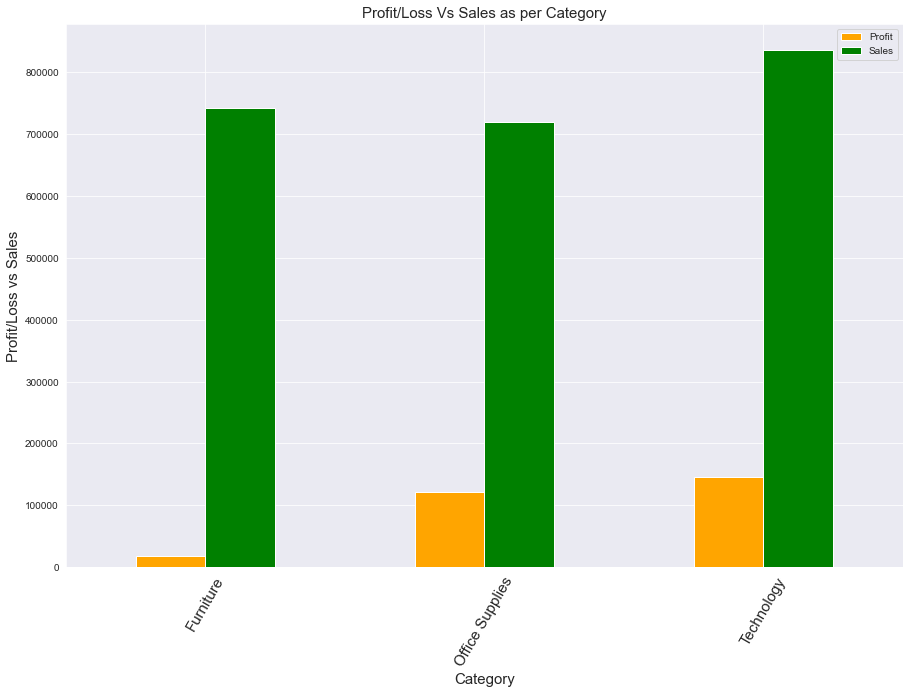

In [103]:
data.groupby(['Category'])['Profit','Sales'].sum().plot(kind='bar',figsize=(15,10),
                                                        color=['orange','green'])
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Profit/Loss vs Sales',fontsize=15)
plt.title('Profit/Loss Vs Sales as per Category',fontsize=15)
plt.show()

* Technology has highest sales as a result we can see that the profit is significantly higher than other categories.
* Furniture has the lowest sales and the profits are also the lowest.
* ``Furniture`` needs to be monitored.

IV . Profit/Loss Vs Sales as per Sub-Category:

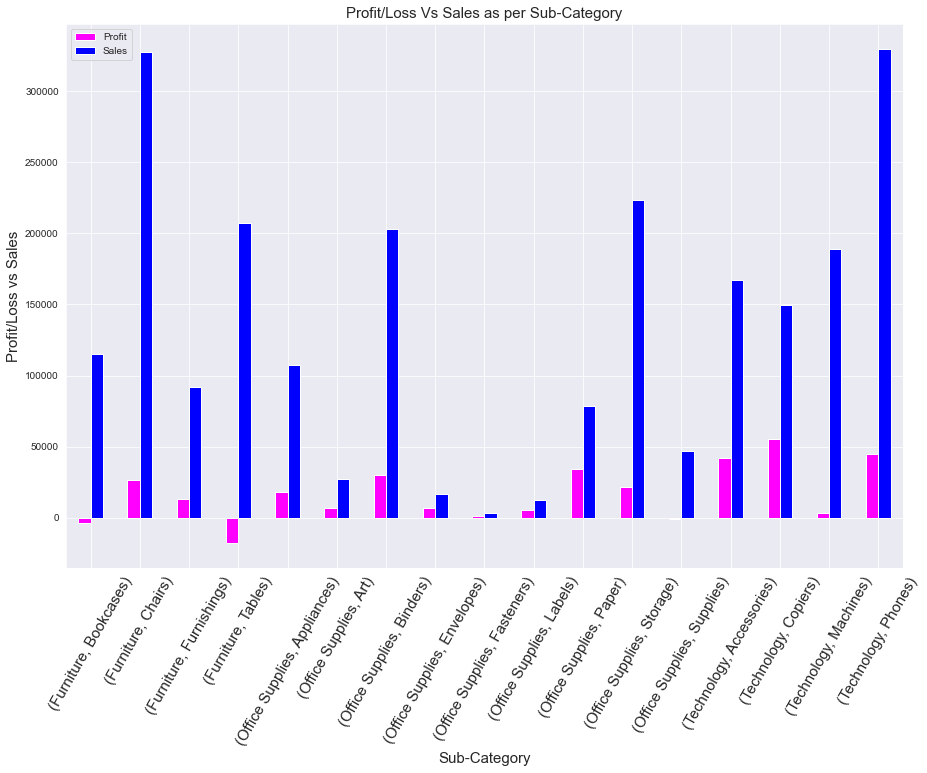

In [112]:
data.groupby(['Category','Sub-Category'])['Profit','Sales'].sum().plot(kind='bar',figsize=(15,10),
                                                        color=['magenta','blue'])
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Profit/Loss vs Sales',fontsize=15)
plt.title('Profit/Loss Vs Sales as per Sub-Category',fontsize=15)
plt.show()

* ``Bookcases`` and ``Tables`` have incurred losses even after siginifant sales.
* These sub-categories under ``Furniture`` need to be monitored.
* No profit is generated in the sub-category ``Storage`` in spite of significnt sales.
* Sales of ``Machines`` are significantly high but this sub-category has not generated good profits. Hence the focus should be put to understand the reasons.

III . Profit/Loss Vs Sales as per Segment:

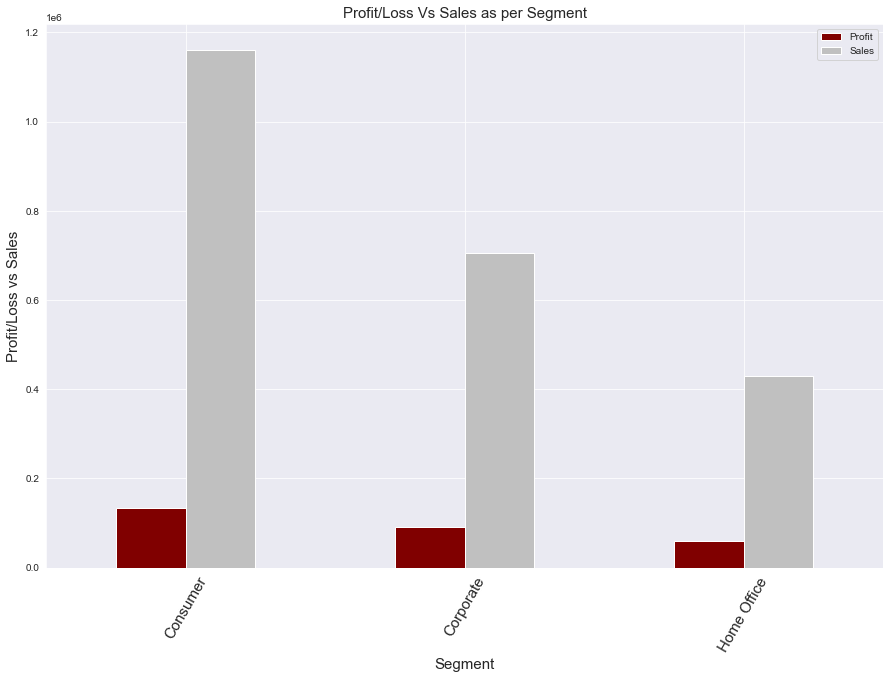

In [107]:
data.groupby(['Segment'])['Profit','Sales'].sum().plot(kind='bar',figsize=(15,10),
                                                        color=['maroon','silver'])
plt.xticks(rotation=60,fontsize=15)
plt.xlabel('Segment',fontsize=15)
plt.ylabel('Profit/Loss vs Sales',fontsize=15)
plt.title('Profit/Loss Vs Sales as per Segment',fontsize=15)
plt.show()

* ``Home Office`` has lowest sales and lowest profit.
* It should be focused on.